Имеется файл с временной статистикой работы асессоров над однотипным заданием. 

Формат файла: login tid Microtasks assigned_ts tclosed_ts 

Пояснение к формату: login — логин асессора; 
                     tid — id оцениваемого задания (task id); 
                     Microtasks – количество микрозаданий в одном задании; 
                     assigned_ts — время резервирования системой задания для асессора; 
                     closed_ts — точное время завершения работы над заданием; 
                     
                     разделитель — табуляция \t. 
                     
Задание может состоять из одного или несколько микрозаданий. Время резервирования задания (assigned_ts) указывает на тот момент, когда система назначила определенного асессора исполнителем этого задания. Этот момент может совпадать с временем начала работы асессора над заданием, а может и не совпадать (асессор может отойти выпить чаю, а потом приступить к заданию, асессор может выполнять предыдущее задание, в то время как за ним зарезервированы новые). 

Предположим, что асессор за 30 секунд своего рабочего времени получает N рублей. Какую оплату вы считаете справедливой для выполнения асессором одного микрозадания из этого файла? Опишите подробно все этапы вашего решения.

In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('data_task4_old.txt', sep='\t', index_col=0)

In [7]:
df.head(5)

,tid,Microtasks,assigned_ts,closed_ts
login,,,,
login0,190563850.0,4.0,2017-04-20 12:09:39,2017-04-20 13:13:01
login0,190561754.0,1.0,2017-04-20 12:10:30,2017-04-20 12:28:29
login0,190565906.0,4.0,2017-04-20 12:21:31,2017-04-20 13:30:10
login0,190560246.0,1.0,2017-04-20 12:28:30,2017-04-20 13:13:56
login0,190562168.0,2.0,2017-04-20 12:28:42,2017-04-20 13:14:50


Предварительный план:

1. Проверить гипотезу о том, что для каждому tid соответствует лишь одна запись о выполнении

Исходя из условий возможным вариантом поиска решения считаю:
2. Рассчитать время, потраченное на каждое задание, построить график, оценить полученные данные
3. Рассчитать время, потраченное на каждое микрозадание для каждого выполнения, построить график, оценить

In [4]:
# Всего записей в файле
print(len(df))

701827


In [13]:
test = df.groupby('tid')

In [14]:
%%time

print(len(test))

635044
Wall time: 8.6 s


In [15]:
task = df.groupby('Microtasks')

In [16]:
%%time

print(len(task))

50
Wall time: 73 ms


Далее вычислим продолжительность выполнения каждого отдельного задания 

In [32]:
df['time'] = np.nan

In [40]:
df['time'] = pd.to_datetime(df['closed_ts']) - pd.to_datetime(df['assigned_ts'])

In [46]:
df.tail(5)

,tid,Microtasks,assigned_ts,closed_ts,time
login,,,,,
login766,195656026.0,1.0,2017-05-15 15:53:27,2017-05-15 16:16:56,00:23:29
login766,195656174.0,1.0,2017-05-15 15:53:33,2017-05-15 16:21:53,00:28:20
login766,195656466.0,1.0,2017-05-15 15:53:38,2017-05-15 16:23:41,00:30:03
login766,195656336.0,3.0,2017-05-15 15:54:18,2017-05-15 16:32:11,00:37:53
login766,195656078.0,2.0,2017-05-15 15:54:59,2017-05-15 16:17:32,00:22:33


In [143]:
df.sort_values(by = ['time'], ascending=False).head(5)

,tid,Microtasks,assigned_ts,closed_ts,time
login,,,,,
login657,185714006.0,7.0,2017-04-27 06:33:43,2017-05-20 22:06:41,23 days 15:32:58
login657,185714006.0,7.0,2017-04-27 06:33:43,2017-05-20 22:06:41,23 days 15:32:58
login300,185713854.0,17.0,2017-04-29 06:33:09,2017-05-22 16:21:41,23 days 09:48:32
login300,185713854.0,17.0,2017-04-29 06:33:09,2017-05-22 16:21:41,23 days 09:48:32
login300,189300182.0,13.0,2017-04-30 06:32:42,2017-05-22 16:23:44,22 days 09:51:02


Как видно из отсортированных данных, изучаемый датасет имеет повторения, от которых следует избавиться

In [57]:
dfclean = df.drop_duplicates()
print(len(dfclean))

680037


In [58]:
dfclean.sort_values(by = ['time'], ascending=False).head(5)

,tid,Microtasks,assigned_ts,closed_ts,time
login,,,,,
login657,185714006.0,7.0,2017-04-27 06:33:43,2017-05-20 22:06:41,23 days 15:32:58
login300,185713854.0,17.0,2017-04-29 06:33:09,2017-05-22 16:21:41,23 days 09:48:32
login300,189300182.0,13.0,2017-04-30 06:32:42,2017-05-22 16:23:44,22 days 09:51:02
login300,185713868.0,15.0,2017-05-03 06:32:56,2017-05-22 16:26:19,19 days 09:53:23
login657,195642338.0,1.0,2017-05-17 06:41:20,2017-05-29 17:03:56,12 days 10:22:36


In [77]:
dfclean = dfclean.copy()

Далее вычислим среднее время, затраченное на 1 микрозадание

In [80]:
dfclean['timeonetask'] = dfclean['time'] / dfclean['Microtasks']

In [84]:
dfclean.sort_values(by = ['time'], ascending=False).head(5)

,tid,Microtasks,assigned_ts,closed_ts,time,timeonetask
login,,,,,,
login657,185714006.0,7.0,2017-04-27 06:33:43,2017-05-20 22:06:41,23 days 15:32:58,3 days 09:04:42.571428
login300,185713854.0,17.0,2017-04-29 06:33:09,2017-05-22 16:21:41,23 days 09:48:32,1 days 09:02:51.294117
login300,189300182.0,13.0,2017-04-30 06:32:42,2017-05-22 16:23:44,22 days 09:51:02,1 days 17:22:23.230769
login300,185713868.0,15.0,2017-05-03 06:32:56,2017-05-22 16:26:19,19 days 09:53:23,1 days 07:03:33.533333
login657,195642338.0,1.0,2017-05-17 06:41:20,2017-05-29 17:03:56,12 days 10:22:36,12 days 10:22:36


In [137]:
dfclean.sort_values(by = ['time'], ascending=True).head(5)

,tid,Microtasks,assigned_ts,closed_ts,time,timeonetask
login,,,,,,
login585,197340894.0,1.0,2017-05-24 16:13:06,2017-05-24 16:00:57,-1 days +23:47:51,-1 days +23:47:51
login699,195930544.0,1.0,2017-05-16 14:14:37,2017-05-16 14:14:40,00:00:03,00:00:03
login699,195931178.0,1.0,2017-05-16 14:14:29,2017-05-16 14:14:32,00:00:03,00:00:03
login699,195931108.0,1.0,2017-05-16 14:15:31,2017-05-16 14:15:34,00:00:03,00:00:03
login699,195930258.0,1.0,2017-05-16 14:14:42,2017-05-16 14:14:45,00:00:03,00:00:03


Как видно, исследуемы набор данных содержит отрицательные значения времени выполнения. Исходя из начального условия можно утверждать, что подобный случай невозможен и является результатом ошибки. Следовательно, его следует удалить из набора данных.

In [139]:
dfclean = dfclean[dfclean.time != '-1 days +23:47:51']

In [141]:
dfclean.sort_values(by = ['time'], ascending=True).head(5)

,tid,Microtasks,assigned_ts,closed_ts,time,timeonetask
login,,,,,,
login699,195930544.0,1.0,2017-05-16 14:14:37,2017-05-16 14:14:40,00:00:03,00:00:03
login699,195931108.0,1.0,2017-05-16 14:15:31,2017-05-16 14:15:34,00:00:03,00:00:03
login699,195931178.0,1.0,2017-05-16 14:14:29,2017-05-16 14:14:32,00:00:03,00:00:03
login699,195930258.0,1.0,2017-05-16 14:14:42,2017-05-16 14:14:45,00:00:03,00:00:03
login699,195931574.0,1.0,2017-05-16 14:15:41,2017-05-16 14:15:45,00:00:04,00:00:04


In [187]:
# Создание и заполнение поля seconds, отражающего период выполнения задания в секундах
# Данный пункт необходим для облегчения операций с данными в дальнейшем

dfclean['seconds'] = dfclean['timeonetask'] / pd.to_timedelta('1s')
dfclean.head(5)

,tid,Microtasks,assigned_ts,closed_ts,time,timeonetask,seconds
login,,,,,,,
login0,190563850.0,4.0,2017-04-20 12:09:39,2017-04-20 13:13:01,01:03:22,00:15:50.500000,950.50
login0,190561754.0,1.0,2017-04-20 12:10:30,2017-04-20 12:28:29,00:17:59,00:17:59,1079.00
login0,190565906.0,4.0,2017-04-20 12:21:31,2017-04-20 13:30:10,01:08:39,00:17:09.750000,1029.75
login0,190560246.0,1.0,2017-04-20 12:28:30,2017-04-20 13:13:56,00:45:26,00:45:26,2726.00
login0,190562168.0,2.0,2017-04-20 12:28:42,2017-04-20 13:14:50,00:46:08,00:23:04,1384.00


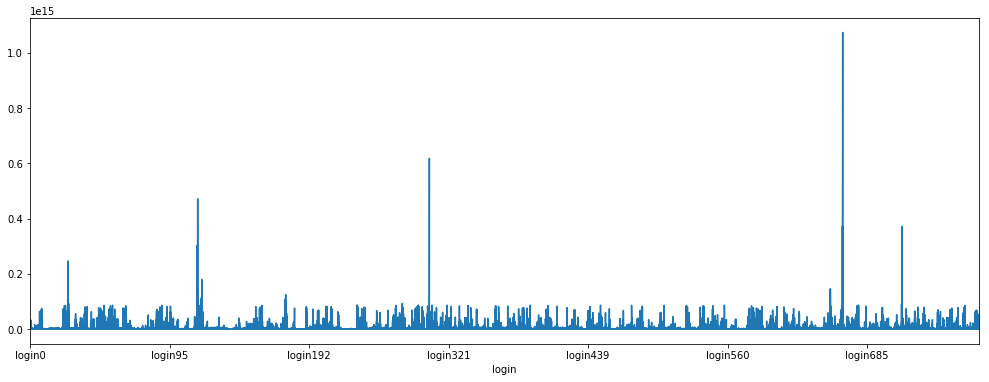

In [144]:
dfclean.timeonetask.plot(figsize = (17, 6))

Проверка на происхождение данных о продолжительности выполнения одного микрозадания из нормальной выборки при момощи теста Шапиро-Вилка.

In [323]:
from scipy import stats

The algorithm used is described in [4] but censoring parameters as described are not implemented. For N > 5000 the W test statistic is accurate but the p-value may not be.

The chance of rejecting the null hypothesis when it is true is close to 5% regardless of sample size.

In [326]:
stats.shapiro(dfclean['seconds'].sample(5000))

(0.14735138416290283, 0.0)

Согласно полученным результатам, данные не исходят из нормального распеределения.

In [327]:
dfclean.seconds.median()

75.0

In [328]:
dfclean.seconds.mean()

533.7976673944205

Как видно из полученных данных среднее значение времени выполнения 1 микрозадания в 7 раз превосходит медианное. Исходя из этого, можно предположить неравноценность одинаковых временных промежутков при выполнении заданий с различным количеством микрозаданий.
Чтобы подтвердить или же опровергнуть данное предположение сгруппируем данные по количеству микрозаданий в задании и построим график хода величины времени, затраченного на 1 микрозадание

In [258]:
task_temp = dfclean.groupby('Microtasks').mean()
#task_temp_round = task_temp.seconds.round(0)
task_temp.head()

,tid,seconds
Microtasks,,
1.0,1.943870e+08,493.959199
2.0,1.914590e+08,502.204375
3.0,1.891566e+08,534.751867
4.0,1.853023e+08,561.313824
5.0,1.633238e+08,632.394280


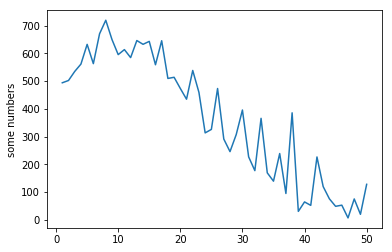

In [235]:
import matplotlib.pyplot as plt
plt.plot(task_temp.seconds)
plt.ylabel('some numbers')
plt.show()

Исходное предположение подтвердилось - с ростом количества микрозаданий, среднее время, затраченное на выполнение 1, снижается в "примерно" 4 раза на промежутке 10-40 микрозаданий.
Это может быть связано с возратанием количества при использовании более "мелкого" дробления заданий, что, естественно, требует меньшего времени на выполнение. 

Также это может быть связано с тем, что при росте количества микрозаданий временные потери на приемку и сдачу задания асессором разбиваются на более мелкие части и не оказывают столь существенного влияния. Однако, данный пункт нельзя рассматривать как главный определяющий фактор в силу того, что максимум затрачиваемого времени наблюдается для заданий с 10 +-5 микрозаданий.

Дльнейший путь получения корректного размера выплаты состоит в аппроксимации данного графика функцией.

In [277]:
y = task_temp['seconds'].to_numpy()
x = task_temp.index.to_numpy()

In [278]:
from matplotlib.pyplot import *
%matplotlib inline

In [304]:
# Рассчитаем полиномы первых 5 степеней
p1 = np.polyfit(x, y, 1)
p2 = np.polyfit(x, y, 2)
p3 = np.polyfit(x, y, 3)
p4 = np.polyfit(x, y, 4)
p5 = np.polyfit(x, y, 5)
print(p1)

[-13.88839036 718.73882546]


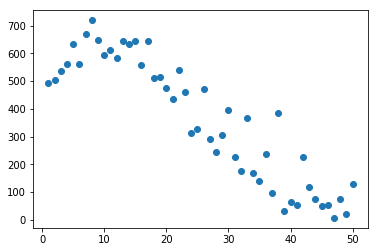

In [286]:
plot(x,y,'o')

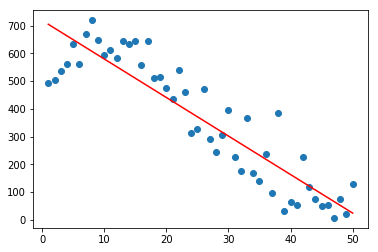

In [298]:
# График полинома 1 степени
plot(x,y,'o')
plot(x, np.polyval (p1,x), 'r-')

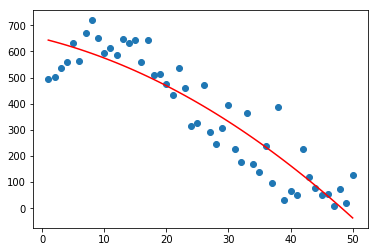

In [289]:
# График полинома 2 степени
plot(x,y,'o')
plot(x, np.polyval (p2,x), 'r-')

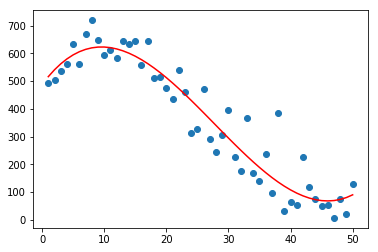

In [290]:
# График полинома 3 степени
plot(x,y,'o')
plot(x, np.polyval (p3,x), 'r-')

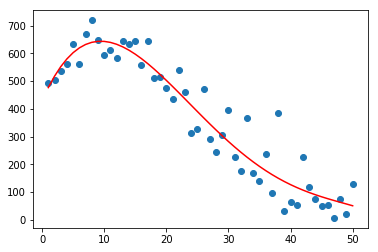

In [302]:
# График полинома 4 степени
plot(x,y,'o')
plot(x, np.polyval (p4,x), 'r-')

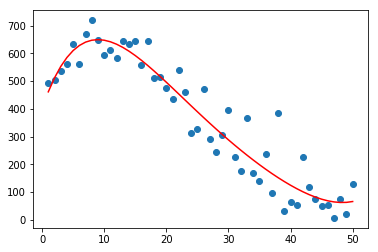

In [305]:
# График полинома 5 степени
plot(x,y,'o')
plot(x, np.polyval (p5,x), 'r-')

30 секунд - N рублей

Анализируя полученные графики стоит отметить, что полином 5й степени, наиболее точно описывающий исходные данные, является оптимальным решением для данного набора данных.

In [306]:
print(p5)

[ 1.68081275e-05 -2.68585077e-03  1.76065301e-01 -5.64372323e+00
  6.60086315e+01  4.00771268e+02]


Предполагемая конечная схема определения стоимости микрозадания:

1. Получение количества микрозаданий - n
2. Определение среднего времени выполнения одного микрозадания при помощи полинома 5й степени - x
3. Получение стоимости 1 микрозадания из исходного соотношения

Пример реализации

In [313]:
def appraiser(n, N):
"""
n   number of tasks
N   cost of asessors 30 seconds

"""    
    p = [ 1.68081275e-05, -2.68585077e-03, 1.76065301e-01, -5.64372323e+00,  6.60086315e+01,  4.00771268e+02]
    
    time = np.polyval(p, n) 
    
    cost = (time * N)/30
    
    return cost

30
[461.30957253 511.57972474 552.54394702 585.10403531 610.10337604
 628.32896314 640.51341497 647.33699136 649.42961052 647.37286605
 641.70204392 632.90813942 621.43987417 607.70571305 592.07588121
 574.88438105 556.43100917 536.98337334 516.77890953 496.0268988
 474.91048436 453.58868849 432.19842955 410.8565389  389.66177796
 368.69685511 348.0304427  327.71919401 307.80976027 288.34080755
 269.34503382 250.85118589 232.88607636 215.47660065 198.65175393
 182.44464812 166.89452884 152.04879243 137.96500287 124.7129088
 112.37646048 101.05582675  90.86941203  81.95587328  74.47613698
  68.6154161   64.58522709  62.62540684  63.00612966  66.02992425]


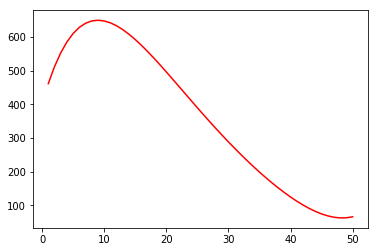

In [322]:
plot(x, appraiser(n = x, N = 30), 'r-')